In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.linear_model import BayesianRidge
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = pd.read_csv('data_final.csv')

In [20]:
df.columns
df.head(2)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,duration_deliv
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,13 days 04:05:00
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,13 days 04:05:00


#### Echantillon à T1 à T8

In [21]:
#df0 = df[df.order_purchase_timestamp<='2018-01-01']
df_ = {}
for i in range(1,9) : 
    df_[i] = df[df.order_purchase_timestamp<=f'2018-0{i}-31']
### creation d'une fonction pour gérer les calculs répetitifs

In [22]:
df_[3].sort_values('order_purchase_timestamp', ascending=False).head(2)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,duration_deliv
75844,75844,39bb6b8fd2355d062fb76cac478fe497,cff1a732b941ddbd23d5077665a42e93,delivered,2018-03-30 23:32:46,2018-03-31 10:48:08,2018-04-10 21:42:44,2018-04-16 20:32:37,2018-04-18 00:00:00,1,...,esporte_lazer,58.0,402.0,1.0,650.0,16.0,7.0,13.0,sports_leisure,7 days 02:17:16
46769,46769,d3842b5388a1a39f220c1fecd16807a6,9999a835a6a953d5d95e3d0d09946f6e,delivered,2018-03-30 23:27:37,2018-03-30 23:47:24,2018-04-02 22:23:37,2018-04-06 17:49:32,2018-04-27 00:00:00,2,...,moveis_escritorio,46.0,1350.0,1.0,11875.0,57.0,55.0,22.0,office_furniture,24 days 01:36:23


In [23]:
df_[1].head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,duration_deliv
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,13 days 04:05:00
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,13 days 04:05:00
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,13 days 04:05:00
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,10 days 08:31:27
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,10 days 06:24:17


#### Features agrégation des 8 tables

In [24]:
import pandas as pd
grouped_single = {}
# Function to create a new variable in the DataFrame
def create_new_variable(data_frame, new_column_name, new_column_data):
    data_frame[new_column_name] = new_column_data
for i in range(1, 9) :     
    max_date = pd.to_datetime(df_[i].order_approved_at).max()
    create_new_variable(df_[i], 'max_date', max_date)
    date_recently = pd.to_datetime(df_[i].max_date)  - pd.to_datetime(df_[i].order_approved_at)
    create_new_variable(df_[i], 'date_recently', date_recently)
    grouped_single[i] = df_[i].groupby('customer_unique_id').agg({'payment_value' : ['sum'],
                                                                   'order_id' : 'nunique',
                                                                   'review_score' : 'mean',  
                                                                   'product_weight_g' : 'mean',
                                                                   'date_recently' : 'min'})

    grouped_single[i].reset_index(inplace = True)
    grouped_single[i].columns = ['customer_unique_id','Monetary', 'frequency', 'review_score_mean', 'product_w_mean','recency']
    #grouped_single.sort_values('nb_transact', ascending=False).head()
    grouped_single[i]['recency'] = grouped_single[i].recency.dt.days

C:\Users\diagne080894\AppData\Local\Temp\ipykernel_8888\3282965571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[new_column_name] = new_column_data
C:\Users\diagne080894\AppData\Local\Temp\ipykernel_8888\3282965571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[new_column_name] = new_column_data
C:\Users\diagne080894\AppData\Local\Temp\ipykernel_8888\3282965571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

#### Kmeans echantillon 1 & 2

##### Correction des missings values dans les différents échantillons

In [25]:
for i in range(1,9) : 
    data = grouped_single[i]
    num_vars = [x for x in data.columns if data[x].dtype != 'object']
    imp = IterativeImputer(estimator=BayesianRidge())
    num_vars_arr = data[num_vars].values
    array = imp.fit_transform(num_vars_arr)
    data[num_vars] = pd.DataFrame(array, columns= num_vars)
display(grouped_single[1].isna().sum())

customer_unique_id    0
Monetary              0
frequency             0
review_score_mean     0
product_w_mean        0
recency               0
dtype: int64

In [26]:
scaled_data = {}
grouped_single_ = {}
for i in range(1,9) :
    grouped_single_[i] = grouped_single[i].iloc[:,1:]
    scaler = MinMaxScaler()
    scaled_data[i] = scaler.fit_transform(grouped_single_[i].values)

In [27]:
labels = {}
kmeans = {}
for j in range(1,9) : 
    num_clusters = 7
    kmeans[j] = KMeans(n_clusters=num_clusters)
    labels[j] = kmeans[j].fit_predict(scaled_data[j])
    centroids = kmeans[j].cluster_centers_

    # Créer le graphique en radar
    categories = grouped_single_[j].columns
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle

C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diagne080894\Documents\Min\envs\pyenv1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

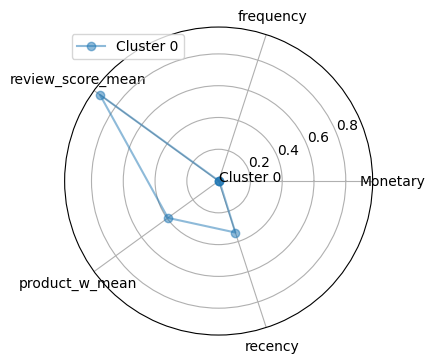

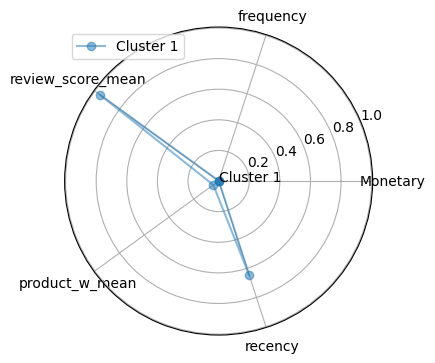

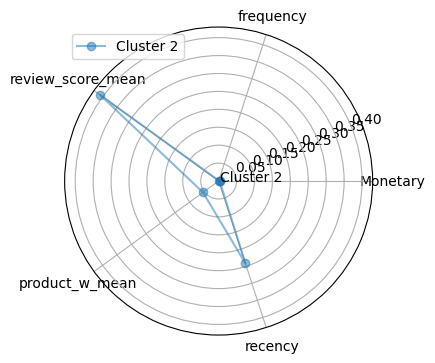

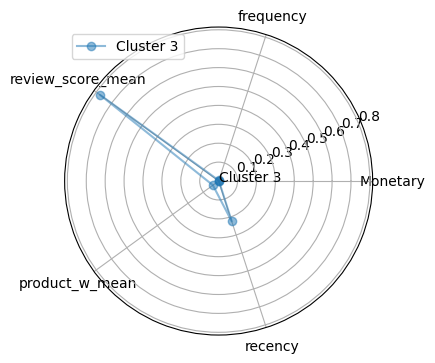

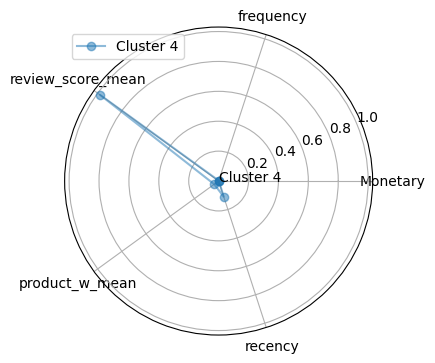

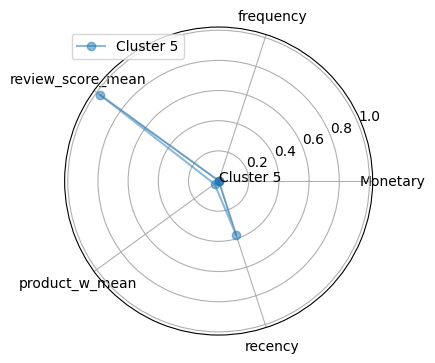

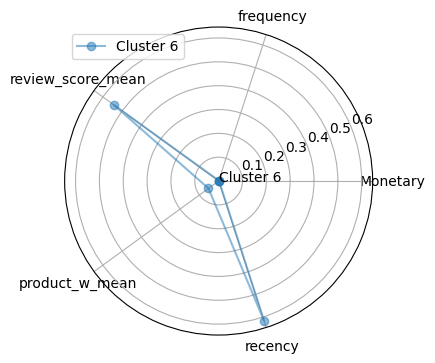

In [28]:
for i in range(num_clusters):
    plt.figure(figsize=(8, 4))
    cluster_data = centroids[i]
    cluster_data = np.concatenate((cluster_data, [cluster_data[0]]))  # Fermer la boucle
    plt.polar(angles, cluster_data, marker='o', alpha=0.5, label=f'Cluster {i}')
    # Étiqueter les groupes sur le graphique
    plt.annotate(f'Cluster {i}', xy=(angles[0], cluster_data[0]))
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='upper left')
    plt.show()

In [29]:
grouped_single_[1].shape

(48982, 5)

In [34]:
ari_scores = []
pred = {}
for i in range(2,9) :
    pred = kmeans[1].predict(scaled_data[i]) ### Toujours prédire avec le kmeans[1]
    ari = adjusted_rand_score(pred, labels[i])
    ari_scores.append(ari)
    # Affichez les scores ARI pour évaluer la stabilité
print(f"ARI Scores (Adjusted Rand Index) between L1 & L{i}:\n{ari_scores}")
        #print(f"Mean ARI Score: {np.mean(ari_scores)}")

ARI Scores (Adjusted Rand Index) between L1 & L8:
[0.9093528059466628, 0.9728783199918807, 0.8624249480986904, 0.9549227786181732, 0.9207498732808936, 0.7134229601593662, 0.8029339600022289]


In [35]:
ari_scores_unique = []
[ari_scores_unique.append(x) for x in ari_scores if x not in ari_scores_unique]
ari_scores_unique
labs = ['L1_2', 'L1_3', 'L1_4', 'L1_5', 'L1_6', 'L1_7', 'L1_8']
data_ari = pd.DataFrame(labs, columns=['labs'])
data_ari['ari_scores'] = ari_scores_unique
data_ari

,labs,ari_scores
0,L1_2,0.909353
1,L1_3,0.972878
2,L1_4,0.862425
3,L1_5,0.954923
4,L1_6,0.920750
5,L1_7,0.713423
6,L1_8,0.802934


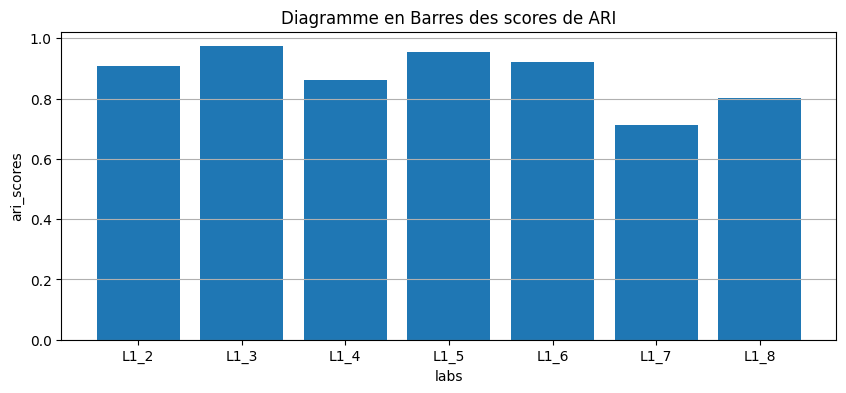

In [36]:
# Tracer le diagramme en barres
plt.figure(figsize=(10, 4))  # Définir la taille de la figure
plt.bar(data_ari['labs'], data_ari['ari_scores'])
plt.title('Diagramme en Barres des scores de ARI')
plt.xlabel('labs')
plt.ylabel('ari_scores')
plt.grid(axis='y')  # Afficher la grille sur l'axe des y
plt.show()

#### Nous avons le score de ARI le plus faible, au mois d'août. Donc le modèle de vient moins fiables au bout de 8 mois à partir de la date de mise en production. 